**Project Check-in 5**

In [ ]:
%pip install --upgrade pip
%pip install scikit-lego
%pip install seaborn
%pip install nbstripout
!nbstripout --install

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import keras
df = pd.read_csv("./dataset.csv")

In [31]:
# Step 1: Clean Data
# Remove duplicates
df_cleaned = df.drop(columns='Unnamed: 0').drop_duplicates(subset=['track_id','album_name','artists','track_name'])

# Remove columns with every row unique. Also dropping artist and album because it would be too much one-hot encoding
df_cleaned.drop(columns=['track_id', 'track_name', 'artists','album_name'], inplace=True)
df_cleaned.dropna(axis=0,inplace=True)
df_cleaned.reset_index(drop=True, inplace=True)

#The columns with object datatype will be categorical
columns = df_cleaned.select_dtypes(include=['int64', 'float64']).columns.tolist()
y = pd.get_dummies(df_cleaned, columns=['track_genre']).iloc[:, 15:]
df_cleaned = df_cleaned[columns]

print(y)
scaler = StandardScaler() # Scale the data so that the variances for each feature can be similarly weighted
df_cleaned = scaler.fit_transform(df_cleaned)
df_cleaned = pd.DataFrame(df_cleaned, columns=columns)

       track_genre_acoustic  track_genre_afrobeat  track_genre_alt-rock  \
0                      True                 False                 False   
1                      True                 False                 False   
2                      True                 False                 False   
3                      True                 False                 False   
4                      True                 False                 False   
...                     ...                   ...                   ...   
89736                 False                 False                 False   
89737                 False                 False                 False   
89738                 False                 False                 False   
89739                 False                 False                 False   
89740                 False                 False                 False   

       track_genre_alternative  track_genre_ambient  track_genre_anime  \
0                        

In [3]:
df_cleaned


,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,1.933926,0.013495,0.644260,-0.675976,-1.203286,0.335731,-1.324600,0.490464,-0.875177,-0.535478,0.723666,0.934036,-1.133609,0.226215
1,1.059320,-0.704151,-0.804604,-1.825609,-1.203286,-1.673094,0.754945,-0.098361,1.760797,-0.535464,-0.595072,-0.770280,-1.479854,0.226215
2,1.156499,-0.162163,-0.702731,-1.073476,-1.484194,-0.236523,0.754945,-0.280217,-0.349638,-0.535481,-0.512971,-1.329508,-1.518271,0.226215
3,1.836747,-0.240899,-1.676186,-2.240257,-1.484194,-1.918236,0.754945,-0.451480,1.704637,-0.535263,-0.436002,-1.242010,1.981637,-1.979187
4,2.371228,-0.268168,0.316001,-0.746123,-0.922377,-0.226373,0.754945,-0.307584,0.415912,-0.535481,-0.687948,-1.150708,-0.070037,0.226215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89736,-0.592712,1.379913,-2.208191,-1.556712,-0.079651,-1.511837,0.754945,-0.399395,0.921352,2.330077,-0.670501,-1.657057,0.130711,2.431616
89737,-0.544123,1.379922,-2.196872,-2.016565,-1.484194,-1.880508,-1.324600,-0.417934,1.967702,2.478296,-0.574547,-1.652872,-1.222528,0.226215
89738,-0.544123,0.374726,0.378257,-1.190388,-1.484194,-0.458875,-1.324600,-0.401160,1.592317,-0.535481,-0.682816,1.040556,0.342649,0.226215
89739,0.379072,0.484751,0.140553,-0.500608,0.482166,-0.457725,0.754945,-0.509744,0.155803,-0.535481,0.272114,-0.214856,0.461584,0.226215


2. We evaluated our NN based on the mean squared error between predicted and true values for popularity on our validation dataset. We also graphed predicted values vs true values for popularity.

3. We trained our NN using the built-in learning framework for keras, which utilizes batch gradient descent. Learning rate of 0.001 is recommended for Adam optimizer. Adam will adaptively adjust the learning rate based on an exponentially weighted history of the gradients, so we have "momentum" built-in to our learning rate.

(89741, 14)
(89741, 113)
Epoch 1/25
2244/2244 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.0108 - loss: 8.4054 - val_accuracy: 0.0087 - val_loss: 9.5555
Epoch 2/25
2244/2244 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0106 - loss: 9.2488 - val_accuracy: 0.0187 - val_loss: 9.5960
Epoch 3/25
2244/2244 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0203 - loss: 9.0760 - val_accuracy: 0.0148 - val_loss: 9.5439
Epoch 4/25
2244/2244 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0164 - loss: 9.4424 - val_accuracy: 0.0148 - val_loss: 9.5439
Epoch 5/25
2244/2244 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0171 - loss: 9.4559 - val_accuracy: 0.0148 - val_loss: 9.5439
Epoch 6/25
2244/2244 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0167 - loss: 9.4523 - val_accuracy: 0.0148 - val_loss: 9.5439
Epoch 7/25
2244/2244 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0156 - loss: 9.4789 - val_accuracy: 0.0148 - val_loss: 9.5439
Epoch 8/25
2244/2244 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy:

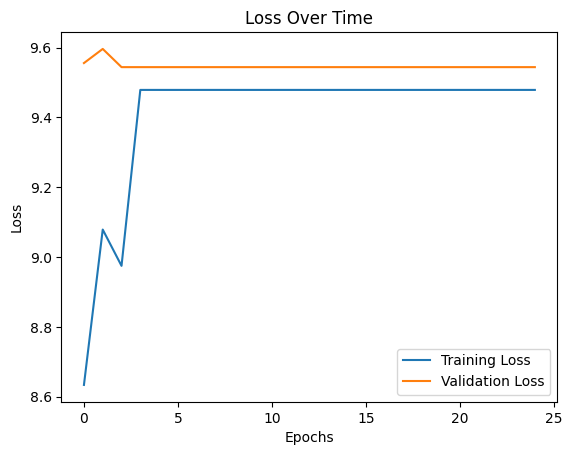

561/561 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
[42 42 42 ... 42 42 42]
(17949,)
       Real Value  Predicted Value
3737           48               42
12775          84               97
4925           45               42
11029          97               42
6041           40               42
14782          67               42
1596           51               42
3854          106               42
17308          92               42
6996           41               42


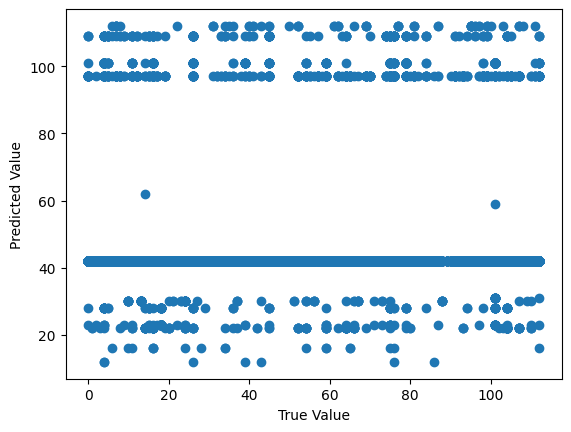

In [50]:
X = df_cleaned
print(X.shape)
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = keras.Sequential([
    keras.layers.Input(shape=(14,)),
    keras.layers.Dense(64, activation='relu'),  # Fully connected layer with 64 units
    keras.layers.Dense(64, activation='relu'),  # Fully connected layer with 64 units
    keras.layers.Dense(64, activation='softmax'),  # Fully connected layer with 64 units
    keras.layers.Dense(113)  # Output layer for 10 classes
])

# Compile the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=25, validation_data=(X_test, y_test))
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Validation Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Time')
plt.legend()
plt.show()

# Generate predictions
predictions = np.argmax(model.predict(X_test), axis=1)
print(predictions)
print(predictions.shape)
y_test = np.argmax(y_test, axis=1)

# Create a DataFrame to compare predictions with real values
comparison_df = pd.DataFrame({
    'Real Value': y_test,
    'Predicted Value': predictions
})
plt.xlabel("True Value")
plt.ylabel("Predicted Value")
plt.scatter(y_test, predictions)
# Display a sample of the table
print(comparison_df.sample(10))  # Show 10 random samples